In [1]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
df = pd.read_csv("Final_nrd_Prop_compn.csv")

In [3]:
#Top five columns of the data
df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,M,N,P,Q,R,S,T,V,W,Y
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.018571,0.051429,0.041429,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.008571,0.025714,0.018571,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.015714,0.064286,0.051429,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.008571,0.025714,0.030000,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.008571,0.032857,0.032857,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143


In [4]:
#Number of columns and rows
df.shape

(2747, 152)

In [5]:
#Number of columns under each class
df.Class.value_counts()

Carb      1111
CGC        693
Hetero     500
DNA        280
RNA        163
Name: Class, dtype: int64

In [6]:
#New dataframe with only carbohydrate class and CGC
Carb_df = df[(df['Class'] == 'Carb') | (df['Class'] == 'CGC')]

In [8]:
#Creating a column "target" which represents presence and absence of CGC as 1 and 0 respectively
Carb_df["target"] = np.where(Carb_df["Class"].str.contains("CGC"), 1, 0)

C:\Users\Senthil\AppData\Local\Temp/ipykernel_9552/4235235700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb_df["target"] = np.where(Carb_df["Class"].str.contains("CGC"), 1, 0)


In [9]:
#Check inclusion of target column
Carb_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,N,P,Q,R,S,T,V,W,Y,target
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.051429,0.041429,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714,0
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.025714,0.018571,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571,0
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.064286,0.051429,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714,0
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.025714,0.030000,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429,0
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.032857,0.032857,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143,0


In [10]:
#Split data to X and y
# X -> features, y -> label
y=Carb_df['target']
X=Carb_df.drop(['Class','Entry','target'],axis=1)

In [11]:
print(f'X : {X.shape}')

X : (1804, 150)


In [12]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state = 230,stratify = y)

In [13]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')     

X_train: (1443, 150)
y_train: (1443,)
X_test: (361, 150)
y_test: (361,)


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400,class_weight='balanced')

In [16]:
#clf.fit(X_train,y_train)

In [17]:
#clf.oob_score_

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [19]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132, 147, 162, 177, 193, 208, 223, 238, 254, 269, 284, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [64]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [65]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [66]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132,
                                          147, 162, 177, 193, 208, 223, 238,
                                          254, 269, 284, 300]},
             verbose=2)

In [69]:
best_rf_params = rf_Grid.best_params_
best_rf_params

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 40}

In [70]:
rf_Model = rf_Grid.best_estimator_

In [71]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=5, n_estimators=40, random_state=42)

In [72]:
rf_Model.feature_importances_

array([2.28549837e-04, 0.00000000e+00, 0.00000000e+00, 8.98224102e-03,
       0.00000000e+00, 1.13502734e-03, 2.26605262e-03, 3.54538633e-04,
       0.00000000e+00, 1.94402539e-04, 0.00000000e+00, 0.00000000e+00,
       6.91730108e-04, 2.68240181e-03, 0.00000000e+00, 0.00000000e+00,
       6.95254809e-04, 2.96265141e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.39569734e-04, 0.00000000e+00, 1.31955922e-03,
       7.70693645e-04, 1.64234646e-03, 0.00000000e+00, 5.56085399e-04,
       9.80316757e-03, 2.82568682e-04, 4.93906597e-04, 0.00000000e+00,
       4.15365579e-04, 0.00000000e+00, 9.61770566e-03, 3.66809169e-04,
       1.35456389e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.69801679e-04, 0.00000000e+00, 2.32432712e-03,
       6.12463279e-04, 1.72315876e-03, 0.00000000e+00, 2.78370546e-04,
       0.00000000e+00, 3.99981234e-04, 3.71260654e-04, 9.21605720e-04,
       2.19824019e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [73]:
imp_feat=pd.DataFrame({'Feature_Name' : X.columns.tolist(), 'Feature_Importance' : rf_Model.feature_importances_})

In [74]:
imp_feat.sort_values(by = 'Feature_Importance', ascending=False, inplace = True)

In [75]:
imp_feat.head(21)

,Feature_Name,Feature_Importance
143,Q,0.123183
144,R,0.066823
142,P,0.064244
138,K,0.062882
145,S,0.061860
133,E,0.057489
136,H,0.055449
102,INADH010101,0.048027
132,C,0.034995
90,IROBB760105,0.026609


In [76]:
imp_feat.to_csv('Carb_Feature_importance.csv', index = False)

In [77]:
y_train_prediction = rf_Model.predict(X_train)
y_test_prediction = rf_Model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print ('---------Train')
print(classification_report(y_train,y_train_prediction))
print ('---------Test')
print(classification_report(y_test,y_test_prediction))

---------Train
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       889
           1       0.78      0.69      0.73       554

    accuracy                           0.81      1443
   macro avg       0.80      0.79      0.79      1443
weighted avg       0.81      0.81      0.80      1443

---------Test
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       222
           1       0.68      0.64      0.66       139

    accuracy                           0.75       361
   macro avg       0.73      0.73      0.73       361
weighted avg       0.75      0.75      0.75       361



In [79]:
clf_report_train = pd.DataFrame(classification_report(y_train,y_train_prediction, output_dict=True)).transpose().reset_index()
clf_report_train['Model'] = 'Train'

clf_report_test = pd.DataFrame(classification_report(y_test,y_test_prediction, output_dict=True)).transpose().reset_index()
clf_report_test['Model'] = 'Test'

clf_report = pd.concat([clf_report_train,clf_report_test]) 
clf_report.to_csv('Carb_Clf_Report.csv', index = False)
clf_report

,index,precision,recall,f1-score,support,Model
0,0,0.821918,0.877390,0.848749,889.000000,Train
1,1,0.779352,0.694946,0.734733,554.000000,Train
2,accuracy,0.807346,0.807346,0.807346,0.807346,Train
3,macro avg,0.800635,0.786168,0.791741,1443.000000,Train
4,weighted avg,0.805576,0.807346,0.804975,1443.000000,Train
0,0,0.783550,0.815315,0.799117,222.000000,Test
1,1,0.684615,0.640288,0.661710,139.000000,Test
2,accuracy,0.747922,0.747922,0.747922,0.747922,Test
3,macro avg,0.734083,0.727802,0.730414,361.000000,Test
4,weighted avg,0.745456,0.747922,0.746210,361.000000,Test


In [80]:
y_train_predpro = rf_Model.predict_proba(X_train)[:,1]
y_test_predpro = rf_Model.predict_proba(X_test)[:,1]

In [81]:
y_train_pred =rf_Model.predict(X)

In [82]:
y_train_predpro = rf_Model.predict_proba(X)[:,1]

In [83]:
Carb_df.shape

(1804, 155)

In [84]:
Carb_df['y_train_pred']=y_train_pred

C:\Users\Senthil\AppData\Local\Temp/ipykernel_9552/1345730106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb_df['y_train_pred']=y_train_pred


In [85]:
Carb_df['y_train_predpro']=y_train_predpro

C:\Users\Senthil\AppData\Local\Temp/ipykernel_9552/4220024667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb_df['y_train_predpro']=y_train_predpro


In [86]:
Carb_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,Q,R,S,T,V,W,Y,target,y_train_pred,y_train_predpro
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714,0,0,0.462356
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571,0,0,0.494852
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714,0,0,0.389467
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429,0,0,0.259918
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143,0,0,0.339959


C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


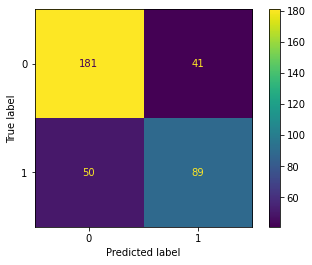

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_confusion_matrix, plot_roc_curve
#confusion = confusion_matrix(X_test, y_test_pred)
#cf=confusion_matrix(True label, Predicted label)
#conf = confusion_matrix(y_test, y_train_pred)
plot_confusion_matrix(rf_Model, X_test, y_test) 

In [88]:
sensitivity = 196/(196+26)
sensitivity

0.8828828828828829

In [89]:
specificity = 94/(45+94)
specificity

0.6762589928057554

In [90]:
sensitivity + specificity

1.5591418756886384

In [91]:
precision = 196/(196+45)
precision

0.8132780082987552

In [92]:
f1 = (precision * sensitivity)/(precision+sensitivity)
f1

0.4233261339092872

C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


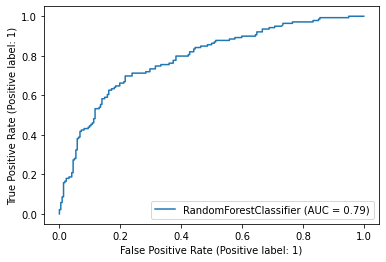

In [93]:
plot_roc_curve(rf_Model, X_test, y_test) 